In [1]:
%pylab inline
from IPython.display import Audio
import librosa
import scipy as sp
from numba import jit
from scipy.spatial import distance

figsize(20,6)
from IPython.display import clear_output
import dill as pickle

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
relevant_path = "audios/ixi"
ixiFiles = [fn for fn in os.listdir(relevant_path)
              if fn.endswith('wav')]
print(ixiFiles)


['zhish.wav', 'kernelmix.wav', 'rocks.wav', 'boomwag.wav', 'snork.wav', 'insec3.wav', 'MacrosemiaTonk.wav', 'pattern10.wav', 'MeimunaNau.wav', 'backswing-old1.wav', 'audoubelclick2.wav', 'laboa.wav', 'swipe-old1.wav', 'Macrosemia.wav', 'revbell.wav', 'laekur.wav', 'birta.wav', 'clicks1.wav', 'clicko-old1.wav', 'bellx.wav', 'camina2.wav', 'dentist-old1.wav', 'heart.wav', 'electro.wav', 'bello.wav', 'camina1.wav', 'noinoi.wav', 'click.wav', 'InsectInfestationZG.wav', 'harshi-old1.wav', 'bellrip3.wav', 'iron.wav', 'patterndrone.wav', 'ausiclick.wav', 'knock.wav', 'rotatingIron.wav', 'firespark.wav', 'insec2.wav', 'camina4.wav', 'kicic.wav', 'phoo-old1.wav', 'bellrip2.wav', 'dalispark.wav', 'triplet.wav', 'glitch-old1.wav', 'ice.wav', 'Cryptotympana.wav', 'vindvabd.wav', 'pattern11.wav', 'camina3.wav', 'paper.wav', 'InsectFly.wav', 'skake2Ed.wav', 'kicicboom.wav', 'bellrip.wav', 'holeMONO.wav', 'spark.wav', 'elstatic-old1.wav', 'jump.wav', 'drr.wav', 'boom2.wav', 'flash-old1.wav', 'pattern

In [3]:
def ixistr(id):
    return str(id) + "_" + ixiFiles[id] + "_"

In [4]:
def nrmse(output,target):
    combinedVar = 0.5 * (np.var(target, ddof=1) + np.var(output, ddof=1))
    errorSignal = output - target
    return np.sqrt(np.mean(errorSignal ** 2) / combinedVar)
sr = 22050
def compareMFCCs(seq1, seq2, hop=64):
    fftSize=2048
    melspec = librosa.feature.melspectrogram(y=seq1, sr=sr, n_fft=fftSize,hop_length=hop)
    mfccs = librosa.feature.mfcc(S=melspec,n_mfcc=20)[1:,:]
    melspec2 = librosa.feature.melspectrogram(y=seq2, sr=sr, n_fft=fftSize,hop_length=hop)
    mfccs2 = librosa.feature.mfcc(S=melspec2,n_mfcc=20)[1:,:]    
    return nrmse(mfccs.flatten(), mfccs2.flatten())
        


In [ ]:
%%time
fbSynthScores = zeros(len(ixiFiles))
cSynthScores = zeros(len(ixiFiles))
fileLengths = zeros(len(ixiFiles))

for currentIxi in range(len(ixiFiles)):
# for currentIxi in range(10):
    print("loading: ", ixiFiles[currentIxi], currentIxi)
    import dill as pickle
    with open("fbsynthResults/resultsFinal/" + ixistr(currentIxi) + "model.dill.pickled", "rb") as input_file:    
        fbmodel = pickle.load(input_file)
    with open("csynthResults/results2019-02-24 12:38:21.504030/" + ixistr(currentIxi) + "model2.dill.pickled", "rb") as input_file:    
        cmodel = pickle.load(input_file)
    fileLengths[currentIxi] = cmodel['original'].shape[0]
    fbSynthScores[currentIxi] = fbmodel['winner']['bestResult']['error']
    cSynthScores[currentIxi] = cmodel['winner']['error']
    print("fb error:\t" + str(fbSynthScores[currentIxi]), "\tc error:\t", str(cSynthScores[currentIxi]));


In [10]:
print(mean(fbSynthScores))
print(mean(cSynthScores))
print(median(fbSynthScores))
print(median(cSynthScores))


0.5678119457855094
0.542062966929134
0.5355412194046704
0.4824226


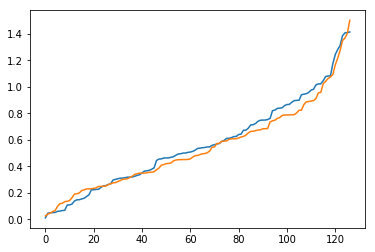

In [11]:
plot(sort(fbSynthScores))
plot(sort(cSynthScores))


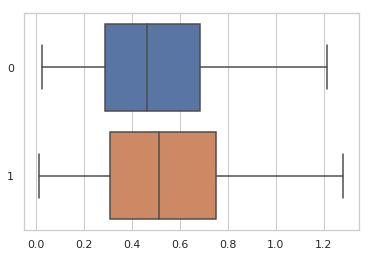

In [12]:
import seaborn as sns
sns.set(style="whitegrid")
data = np.array([sort(cSynthScores)[:-5], sort(fbSynthScores)[:-5]])
ax = sns.boxplot(data=data.T,orient='h')

In [ ]:
figsize(20,10)
import seaborn as sns
sns.set(style="whitegrid")

ax = sns.violinplot(data=data.T,orient='h', inner="stick", cut=0, bw=0.1)
ax.set_xlabel("MFCC Error", fontsize=16)
ax.set_ylabel("Model", fontsize=20)
ax.set_yticklabels(["CCRNN","ESNSPF"], fontsize=16)
plt.savefig("tmp/resultsViolin.pdf", bbox_inches='tight')

In [14]:
from scipy.stats import wilcoxon, mannwhitneyu
stat, p = wilcoxon(cSynthScores, fbSynthScores)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=3872.000, p=0.644
